# Planets

## Consieraciones iniciales

* El sol está en la coordenada x = 0, y = 0
* En el día 0, los planetas están alineados en la coordenada x = 0
* Los años son de 365 días.

  
  
## Solución

Como la distancia desde el sol a cada uno de los planetas es conocida, dichas distancias pueden considerarse como un radio. Al conocer también la velocidad angular de los planetas en grados, es posible conocer el ángulo en función del día.
    
Con estas condiciones conocidas: un radio y un ángulo, es posible saber la posición de cada uno de los planetas en un eje cartesiano x e y haciendo uso de las funciones seno (sin) y coseno (cos). Esta lógica se plasma en la función _planets_positions_ que toma como argumento el número del día.

Comprobando las funciones sin() y cos() con ángulos conocidos, se determina que la función tiene los argumentos de entrada en radianes. Los planetas que giran en sentido horario tienen el argumento igual al ángulo, mientras que el planeta que gira en sentido antihorario tiene el argumento como 360 restando el ángulo.
  
Adicionalmente todas las posiciones en los ejes cartesianos se redondean a enteros para poder hacer comparaciones correctas en casos de alineación planetaria.

La lógica de alineación se encuentra en la función _aligned_ que toma como argumento de entrada las seis coordenadas de posición.

Teniendo las seis coordenadas de posición: tres pares (x,y) para cada planeta es posible comenzar a construir rectas entre los planetas. En el caso de alineación, se podrán construir dos rectas entre los tres planetas cuando se fija a uno de ellos, dichas rectas tendrán la misma pendiente al ser en realidad la misma recta.

Si la recta trazada a través de los puntos alineados pasa por el sol (x = y = 0) entonces se tendrá una situación de **sequía**, si no pasa por el sol se tendrá una condición de clima **óptimo** y si los planetas están desalineados pueden darse las siguientes situaciones:

* Si el triángulo que forman los tres planetas como vértices contiene al sol (x = y = 0) entonces se tendrá clima de **lluvia**. La lluvia tendra un pico cuando el triángulo tenga un máximo de perímetro.
* Si el triángulo que forman los tres planetas como vértices NO contiene al sol (x = y = 0) entonces se tendrá clima **incorrecto**

Para estos casos de no alineación se identifica que el sol queda dentro del triángulo usando la función _is_inside_ que se basa en el supuesto de que el área del triángulo formado por los planetas equivale a la suma del área de tres triángulos más pequeños que se forman teniendo al sol como vértice.

Se genera una lista con los días de los diez años a los que se les aplica las funciones ya mencionadas para obtener como salida una etiqueta de clima y la suma del perímetro del triángulo.

Se generan dataframes a partir de la lista para obtener las respuestas. Adicionalmente se presentan anexos con un par de pruebas: prueba del sol como punto interior del triángulo formado por los planetas y la condición de clima "óptimo".

<img src="is_inside.png">

En el gráfico se muestran un par de triángulos, uno de ellos con el sol como punto interior y que además corresponde a un día de pico de lluvia (rojo).

In [1]:
import math
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def planets_positions(num_days: int) -> Tuple:
    """Function to calculate the x,y positions of the three planets depending on the displacement
        angle due the number of days.
    
    Prefix/suffix
    
    fer: Ferengis
    bet: Betasoides
    vul: Vulcanos 
    
    Args:
        num_days(int): Days to calculate
    """

    #Defining radius in km
    r_fer = 500
    r_bet = 2000
    r_vul = 1000

    #Defining degrees
    d_fer = 1
    d_bet = 3
    d_vul = 5

    #Calculating x,y positions for each planet
    x_fer = round( r_fer * math.sin(math.radians(d_fer * num_days)) ,0)
    y_fer = round( r_fer * math.cos(math.radians(d_fer * num_days)) ,0)

    x_bet = round( r_bet * math.sin(math.radians(d_bet * num_days)) ,0)
    y_bet = round( r_bet * math.cos(math.radians(d_bet * num_days)) ,0)

    #As planet vulcano is moving counterclockwise the angle changes to (360 - d_vul)
    x_vul = round( r_vul * math.sin(math.radians((360 - d_vul) * num_days)) ,0)
    y_vul = round( r_vul * math.cos(math.radians((360 - d_vul) * num_days)) ,0)
    
    return x_fer, y_fer, x_bet, y_bet, x_vul, y_vul

In [3]:
def area(x1, y1, x2, y2, x3, y3):
    """
    This cell code was downloded from: https://www.geeksforgeeks.org/check-whether-a-given-point-lies-inside-a-triangle-or-not/

    # A utility function to calculate area
    # of triangle formed by (x1, y1),
    # (x2, y2) and (x3, y3)

    This code is contributed by Danish Raza 
    
    Args:
        x1(float): Coordinate x1 of point A
        y1(float): Coordinate y1 of point A
        x2(float): Coordinate x2 of point B
        y2(float): Coordinate y2 of point B
        x3(float): Coordinate x3 of point C
        y3(float): Coordinate y3 of point C
    """
 
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1)
                + x3 * (y1 - y2)) / 2.0)


def is_inside(x1, y1, x2, y2, x3, y3, x, y) -> bool:
    """
    A function to check whether point P(x, y) lies inside the triangle formed by
        A(x1, y1), B(x2, y2) and C(x3, y3)
    
    Args:
        x1(float): Coordinate x1 of point A
        y1(float): Coordinate y1 of point A
        x2(float): Coordinate x2 of point B
        y2(float): Coordinate y2 of point B
        x3(float): Coordinate x3 of point C
        y3(float): Coordinate y3 of point C
        x(float): Coordinate x of point P
        y(float): Coordinate y of point P       
    """
 
    # Calculate area of triangle ABC
    a = area (x1, y1, x2, y2, x3, y3)
 
    # Calculate area of triangle PBC
    a1 = area (x, y, x2, y2, x3, y3)
     
    # Calculate area of triangle PAC
    a2 = area (x1, y1, x, y, x3, y3)
     
    # Calculate area of triangle PAB
    a3 = area (x1, y1, x2, y2, x, y)
     
    # Check if sum of A1, A2 and A3
    # is same as A
    if(a == a1 + a2 + a3):
        return True
    else:
        return False


In [4]:
def aligned(x_fer, y_fer, x_bet, y_bet, x_vul, y_vul):
    """
    A function to calculate weathers.
    
    If the three points are aligned, when fixing one point, the line through the other two points should have
    the same slope as it would be the same line. There is a special case when the slope is infinite.
    
    Args:
        x_fer(float): Coordinate x of Ferengis
        y_fer(float): Coordinate y of Ferengis
        x_bet(float): Coordinate x of Betasoides
        y_bet(float): Coordinate y of Betasoides
        x_vul(float): Coordinate x of Vulcanos
        y_vul(float): Coordinate y of Vulcanos
    """
    
    if (x_fer == x_bet and x_fer == x_vul) and x_fer == 0: #Infinite slope
        b = 0
        m1 = 1
        m2 = 1
    else:
        m1 = (y_fer - y_bet) /(x_fer - x_bet)
        m1 = round( m1, 3)
        m2 = (y_fer - y_vul) /(x_fer - x_vul)
        m2 = round( m2, 3)
        b = y_fer - m1 * x_fer  #Calculating the intersection
    
    # Pitagoras formula distance between planets
    d_ferbet = math.sqrt((x_fer - x_bet) **2 + (y_fer - y_bet) **2)
    d_fervul = math.sqrt((x_fer - x_vul) **2 + (y_fer - y_vul) **2)
    d_betvul = math.sqrt((x_bet - x_vul) **2 + (y_bet - y_vul) **2)
    longest_side = max(d_ferbet, d_fervul, d_betvul)
    sum_sides = d_ferbet + d_fervul + d_betvul  # Perimeter calculation
    
     # Pitagoras formula distance between sun and planets
    d_sunbet = math.sqrt((x_bet) **2 + (y_bet) **2)
    d_sunvul = math.sqrt((x_vul) **2 + (y_vul) **2)
    d_sunfer = math.sqrt((x_fer) **2 + (y_fer) **2)
    farthest_planet = max(d_sunbet, d_sunvul, d_sunfer)
    # sum_planets = d_sunbet + d_sunvul + d_sunfer
    
    
    if m1 == m2 and b == 0:  #If intersection is 0 then the line passes through the sun
        return 'Sequia', sum_sides
    elif m1 == m2 and b != 0:  #Line passes through planets but not trhough sun
        return 'Optimo', sum_sides
    else:
        if is_inside(x_fer, y_fer, x_bet, y_bet, x_vul, y_vul, 0, 0):
            return 'Lluvia', sum_sides
        else:
            return 'Incorrecto', sum_sides

# Número de días como parámetro de entrada

In [5]:
# Assuming years of 365 days, and 10 years

anhos = 10 * 365 + 1
num_days = [x for x in range(0, anhos)]

Se genera una lista vacía que irá agregando los resultados de las funciones como elementos de dicha lista: 

* El día
* Las posiciones en coordenadas
* La etiqueta de clima y perímetro

In [6]:
data = []

for pos, el in enumerate(num_days):
    data.append([pos, planets_positions(el), aligned(*planets_positions(el))])

Se crea un dataframe _df_ a partir de la lista, luego un segundo dataframe _df2_ con la etiqueta de clima y el perímetro por separado.

In [7]:
df = pd.DataFrame(data, columns = ['day', 'pos', 'wea'])
df2 = df.assign(**pd.DataFrame(df.wea.tolist(), columns = ['weather', 'perimeter'])) #Separating 'wea' field
df2 = df2[['day', 'pos', 'weather', 'perimeter']]

Respondiendo a las preguntas

* ¿Cuántos períodos de sequía habrá?
* ¿Cuántos períodos de lluvia habrá y qué día será el pico máximo de lluvia?
* ¿Cuántos períodos de condiciones óptimas de presión y temperatura habrá?

Se agrupa el _df2_ para hacer un conteo de las diferentes etiquetas de clima. El resultado se muestra a continuación:

In [8]:
df2.groupby(['weather']).count()['day'].to_frame().reset_index()

,weather,day
0,Incorrecto,2402
1,Lluvia,1208
2,Sequia,41


**2.402** días con climas incorrectos

**1.208** días con lluvias

**41** días de sequía

No se encuentran días óptimos, sin embargo, en el anexo se encuentra una prueba de que con las posiciones indicadas, el código sí entra a esta condición.

# Calculando los días con picos de lluvia...

In [9]:
peak = df2[df2['weather'] == 'Lluvia']['perimeter'].max()   #Maximum perimeter
df2[df2['perimeter'] == peak]  # Filtering rows
peak_rain_days = [x for x in df2[df2['perimeter'] == peak]['day']]
peak_rain_days

[72,
 108,
 252,
 288,
 432,
 468,
 612,
 648,
 792,
 828,
 972,
 1008,
 1152,
 1188,
 1332,
 1368,
 1512,
 1548,
 1692,
 1728,
 1872,
 1908,
 2052,
 2088,
 2232,
 2268,
 2412,
 2448,
 2592,
 2628,
 2772,
 2808,
 2952,
 2988,
 3132,
 3168,
 3312,
 3348,
 3492,
 3528]

In [10]:
len(peak_rain_days)

40

Son **40** días con picos de lluvia.

# Anexos

Probando al sol como punto interior del triángulo formado por los planetas.

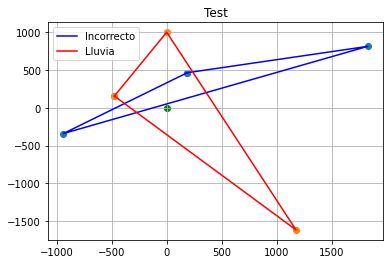

In [11]:
#Test

#Day 22
X = [187, 1827, -940, 187]
Y = [464, 813, -342, 464]


#Day 3528, peak of rain
a = [-476, 1176, 0, -476]
b = [155, -1618, 1000, 155]

plt.title('Test')
plt.plot(X,Y, 'blue', label = 'Incorrecto')
plt.plot(a, b, 'red', label = 'Lluvia')
plt.scatter(X, Y)
plt.scatter(a, b)
x1, y1 = 0, 0
plt.scatter(x1, y1, c = 'green')
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Prueba para un día óptimo

In [12]:
aligned(-400, -500, -200, 0, 400, 1500)

('Optimo', 4308.131845707603)